# Try Not To Overfit;
## an analysis of Don't Overfit! data using data science methods


## Data Exposition and Documentation

I used a single CSV data file, labeled overfitting.csv, throughout the course of this project.

The data file contains 20000 rows of data, each with a unique identifier in the column "case_id" numbered in integers from 1 to 20000 inclusive. Out of these identified rows, only rows 1 through 250 inclusive were 'training' data.

Each case has values for 200 distinct variables, labeled in ascending order from var_1 to var_200. These values are numerical and are real numbers, recorded to 3 decimal places, between 0 and 1 inclusive.

The data file also contains three "Target" columns, representing the sole outcome (either 1 or 0) derived from the data:
    - Target_Practice, with the outcomes for all 20000 rows
    - Target_Leaderboard, with only the outcomes for the training data
    - Target_Evaluate

For purposes of generating the model, I only used the Target_Practice outcomes.



## What I intend to find from the data:

- Formation of equation which derived the data and outcomes
- Using said equation in Bayesian analysis as model (simplest method, prevents data from fitting too tightly)
    - Formation of model and likelihood
    - Formation of prior distribution
    - Bayes' rule ==> formation of posterior distribution as result of analysis

## What I know so far for methodology
- fewer variables -- pick the most relevant of the most relevant
- Source of Relevance: heatmap?
- Since I'm using Bayesian analysis from the start, the bulk of the work lies in forming the equation
- Usage of forum information - is it acceptable in the foreground?

## Data Exploration and Visualization

We visibly have a classification problem here - the outcome is a simple 1 or 0. 
Possible techniques to be used: Naive Bayes, SVM, discrimination algorithm

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# imports and visualization tools

df = pd.read_csv('overfittingALT.csv', dtype=None)

C:\Users\WenRui\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
TRG = df.head(250)
# formation of training data
TRF = df.sample(n=10, random_state=1)
# formation of subset to get a heatmap out
TRH = TRG.Target_Practice


In [4]:
TRI = TRG.drop(TRG.columns[[0, 1, 2, 3, 4]], axis=1)
TRI

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
0,0.660,0.106,0.434,0.387,0.903,0.661,0.158,0.291,0.210,0.936,...,0.015,0.377,0.479,0.050,0.395,0.123,0.833,0.461,0.990,0.105
1,0.844,0.813,0.030,0.939,0.721,0.287,0.539,0.874,0.787,0.732,...,0.112,0.048,0.088,0.860,0.560,0.346,0.511,0.883,0.858,0.599
2,0.560,0.567,0.568,0.434,0.414,0.180,0.448,0.888,0.023,0.690,...,0.874,0.236,0.599,0.602,0.005,0.493,0.122,0.395,0.782,0.943
3,0.681,0.245,0.909,0.785,0.738,0.570,0.692,0.411,0.182,0.520,...,0.219,0.691,0.261,0.031,0.968,0.353,0.798,0.104,0.944,0.090
4,0.846,0.431,0.805,0.237,0.465,0.642,0.219,0.102,0.795,0.131,...,0.704,0.242,0.089,0.605,0.577,0.043,0.686,0.070,0.666,0.572
5,0.961,0.910,0.399,0.860,0.883,0.032,0.618,0.694,0.155,0.138,...,0.027,0.296,0.362,0.983,0.348,0.509,0.447,0.803,0.911,0.998
6,0.695,0.171,0.725,0.053,0.294,0.333,0.616,0.501,0.825,0.356,...,0.526,0.337,0.126,0.530,0.691,0.026,0.761,0.770,0.784,0.556
7,0.984,0.907,0.207,0.042,0.518,0.585,0.585,0.913,0.131,0.307,...,0.680,0.429,0.691,0.813,0.405,0.695,0.821,0.889,0.030,0.513
8,0.531,0.511,0.160,0.383,0.389,0.787,0.034,0.901,0.666,0.714,...,0.608,0.712,0.135,0.102,0.180,0.946,0.837,0.031,0.533,0.713
9,0.302,0.582,0.290,0.460,0.257,0.388,0.115,0.510,0.787,0.002,...,0.572,0.906,0.799,0.870,0.096,0.038,0.534,0.522,0.820,0.079


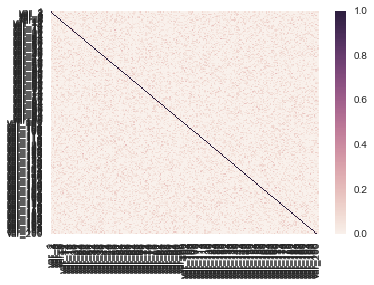

In [5]:
sns.heatmap(TRI.corr(), vmin=0, vmax=1)

# Values would be standardized --> "good way of looking at it"

In [12]:
from sklearn.preprocessing import StandardScaler
TRIste = StandardScaler().fit_transform(TRI)

In [13]:
TRIste


array([[ 0.48913928, -1.29958635, -0.19854151, ..., -0.12800175,
         1.79905289, -1.29735482],
       [ 1.11226389,  1.03250721, -1.60151444, ...,  1.2773666 ,
         1.32887243,  0.35006717],
       [ 0.15048459,  0.2210574 ,  0.266801  , ..., -0.34779869,
         1.05816248,  1.49725981],
       ..., 
       [-0.61826153,  0.64987234, -0.56317556, ..., -1.65325934,
         0.25315655, -0.53367135],
       [ 1.21386029, -1.42163368,  0.81896114, ..., -1.02717107,
         0.66634543, -0.16350163],
       [ 0.49591237,  1.1182702 ,  0.07580221, ..., -1.55668189,
         0.61291584, -0.10347411]])

In [14]:
TRC = np.cov(TRIste.T)
TRC

# Covariance matrix formed.

array([[ 1.00401606,  0.07299314,  0.12064063, ...,  0.02926711,
         0.0496253 ,  0.05281246],
       [ 0.07299314,  1.00401606, -0.02740843, ...,  0.0464714 ,
        -0.03283767, -0.00184031],
       [ 0.12064063, -0.02740843,  1.00401606, ...,  0.11114946,
        -0.04734901, -0.05403651],
       ..., 
       [ 0.02926711,  0.0464714 ,  0.11114946, ...,  1.00401606,
         0.09167021,  0.02737362],
       [ 0.0496253 , -0.03283767, -0.04734901, ...,  0.09167021,
         1.00401606, -0.03761831],
       [ 0.05281246, -0.00184031, -0.05403651, ...,  0.02737362,
        -0.03761831,  1.00401606]])

In [17]:
TRIC = np.corrcoef(TRIste.T)
TRIC
# Normalized covariance matrix, which is the correlation matrix.
# 

array([[ 1.        ,  0.07270117,  0.12015807, ...,  0.02915005,
         0.0494268 ,  0.05260121],
       [ 0.07270117,  1.        , -0.0272988 , ...,  0.04628552,
        -0.03270632, -0.00183295],
       [ 0.12015807, -0.0272988 ,  1.        , ...,  0.11070487,
        -0.04715961, -0.05382036],
       ..., 
       [ 0.02915005,  0.04628552,  0.11070487, ...,  1.        ,
         0.09130353,  0.02726412],
       [ 0.0494268 , -0.03270632, -0.04715961, ...,  0.09130353,
         1.        , -0.03746783],
       [ 0.05260121, -0.00183295, -0.05382036, ...,  0.02726412,
        -0.03746783,  1.        ]])

In [ ]:
# Form "elbow" and determine 5 values
# MOST IMPORTANT MILESTONE: ELBOW
# most relevant (highest eigenvalues)



#project data on all of them, calculate total variance
# Remove eigenvector
# Forloop (X.U and removing U's one by one.)

In [32]:
eig_vals, eig_vecs = np.linalg.eig(TRC.T)
# Generating eigenvalues and eigenvectors. 

eig_vecs

array([[  8.74279409e-02,   6.76010072e-02,  -8.56098330e-02, ...,
          1.62296042e-02,  -1.38325105e-02,  -1.50444501e-02],
       [  1.58653387e-02,  -4.49019829e-03,   1.13348112e-02, ...,
          2.60570139e-02,   6.93345855e-02,   3.66333607e-02],
       [  6.65352224e-02,  -3.78369655e-03,  -7.97599679e-02, ...,
         -1.46720629e-01,   1.15594216e-01,   2.97423602e-02],
       ..., 
       [ -1.21749992e-04,   6.05704112e-03,  -1.18656629e-01, ...,
         -8.12816536e-02,  -3.23077306e-02,   8.55076158e-02],
       [  2.45652913e-02,   6.69921158e-02,  -1.20928099e-01, ...,
         -2.93557218e-02,   1.27647794e-01,   9.31540976e-02],
       [  7.41841933e-03,   1.98964010e-03,   1.06523781e-02, ...,
         -9.52150160e-02,   1.32796083e-01,  -6.86792308e-02]])

In [24]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('HOOYAH!')

HOOYAH!


In [33]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.49405608652
3.44121637386
3.30173814652
3.24882616749
3.07852644711
3.05777140257
2.98131800058
2.96069710791
2.92286445865
2.88489877809
2.85665959328
2.80861213174
2.78531525018
2.69062929146
2.64472302153
2.60279468959
2.55405375545
2.51457179997
2.47341493114
2.41700661563
2.40222840065
2.35984803476
2.35176906619
2.32064242862
2.28137056871
2.2216253342
2.19644391651
2.16150492999
2.14245139552
2.10909932865
2.10429375951
2.05640878572
1.97608674374
1.95621673521
1.91037824679
1.89288073454
1.88665963954
1.84864178227
1.83984271437
1.82203281216
1.79663918259
1.7828369962
1.74015684505
1.72494578796
1.7173076348
1.65320258618
1.64027142099
1.63883957554
1.61899549116
1.58127041727
1.56549714962
1.55794541434
1.52656133935
1.51954999654
1.50170908172
1.45684982613
1.44882776926
1.41457533888
1.40687359525
1.38317522872
1.37973706868
1.35557224928
1.31823264417
1.30250686986
1.27689370842
1.26556850626
1.23444892917
1.21356730607
1.18609155153
1.17

In [55]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print var_exp
print cum_var_exp

[1.740039931087636, 1.7137257541819093, 1.644265596967575, 1.6179154314081265, 1.5331061706595586, 1.5227701584823197, 1.4846963642894846, 1.4744271597376144, 1.4555865004092881, 1.4366795914875083, 1.4226164774519672, 1.3986888416078824, 1.3870869945921289, 1.3399333871485608, 1.3170720647223171, 1.2961917554149276, 1.2719187702116872, 1.2522567563873397, 1.2317606357067892, 1.2036692945823626, 1.1963097435254664, 1.1752043213108037, 1.1711809949634855, 1.1556799294531583, 1.1361225432165623, 1.1063694164303954, 1.0938290704199645, 1.0764294551357123, 1.0669407949712775, 1.050331465666082, 1.0479382922357421, 1.0240915752878883, 0.98409119838328496, 0.97419593413586369, 0.95136836690044546, 0.94265460579931915, 0.93955650048970984, 0.92062360756842032, 0.91624167175494808, 0.90737234045713167, 0.89472631292860338, 0.88785282410848176, 0.86659810883549659, 0.85902300240608442, 0.8552192021317262, 0.82329488791987293, 0.81685516765314126, 0.81614210862061032, 0.80625975459682875, 0.7874

In [61]:
import matplotlib as plt
plt.figure(figsize=(6, 4))

plt.bar(np.arange(0, 250), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(np.arange(0, 250), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

TypeError: 'module' object is not callable

AttributeError: 'module' object has no attribute 'series'

CUMULATIVE DISTRIBUTION IS THE ANSWER :D


## Modelling and critical model selection

Reducing dimensionality of the model by only selecting the most relevant variables.
Relevance was determined through forming an elbow curve from the eigenvectors to reduce the dimensions as greatly as possible.




- Deriving the equation
- Why did you choose the model?
- 